## Breast Cancer Prediction


## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



In [2]:
df=pd.read_csv('breast-cancer.csv')
df.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
324,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.016920,...,13.75,21.38,91.11,583.1,0.12560,0.19280,0.11670,0.05556,0.2661,0.07961
128,866458,B,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.085340,...,16.11,18.33,105.90,762.6,0.13860,0.28830,0.19600,0.14230,0.2590,0.07779
417,90602302,M,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.084810,...,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480
406,905189,B,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.045280,...,17.71,19.58,115.90,947.9,0.12060,0.17220,0.23100,0.11290,0.2778,0.07012
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.063000,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
30,853401,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.124400,...,23.15,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782
241,883539,B,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.011080,...,13.20,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783
304,89296,B,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.015020,...,12.68,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638
45,857010,M,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,...,22.82,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
277,8911670,M,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.058430,...,19.96,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no such missing Values present in dataset

## Data preprocessing

In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


M - Malignint
B - Benign

In [7]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Data Visualization

In [8]:
df.replace({'diagnosis':{'M':1}},inplace=True)
df.replace({'diagnosis':{'B':0}},inplace=True)

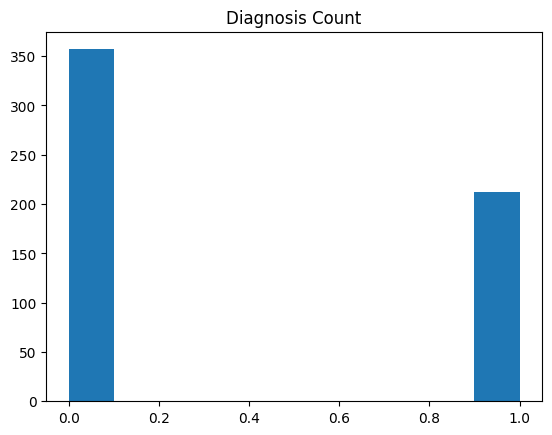

In [9]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis Count')
plt.show()

# Density graph

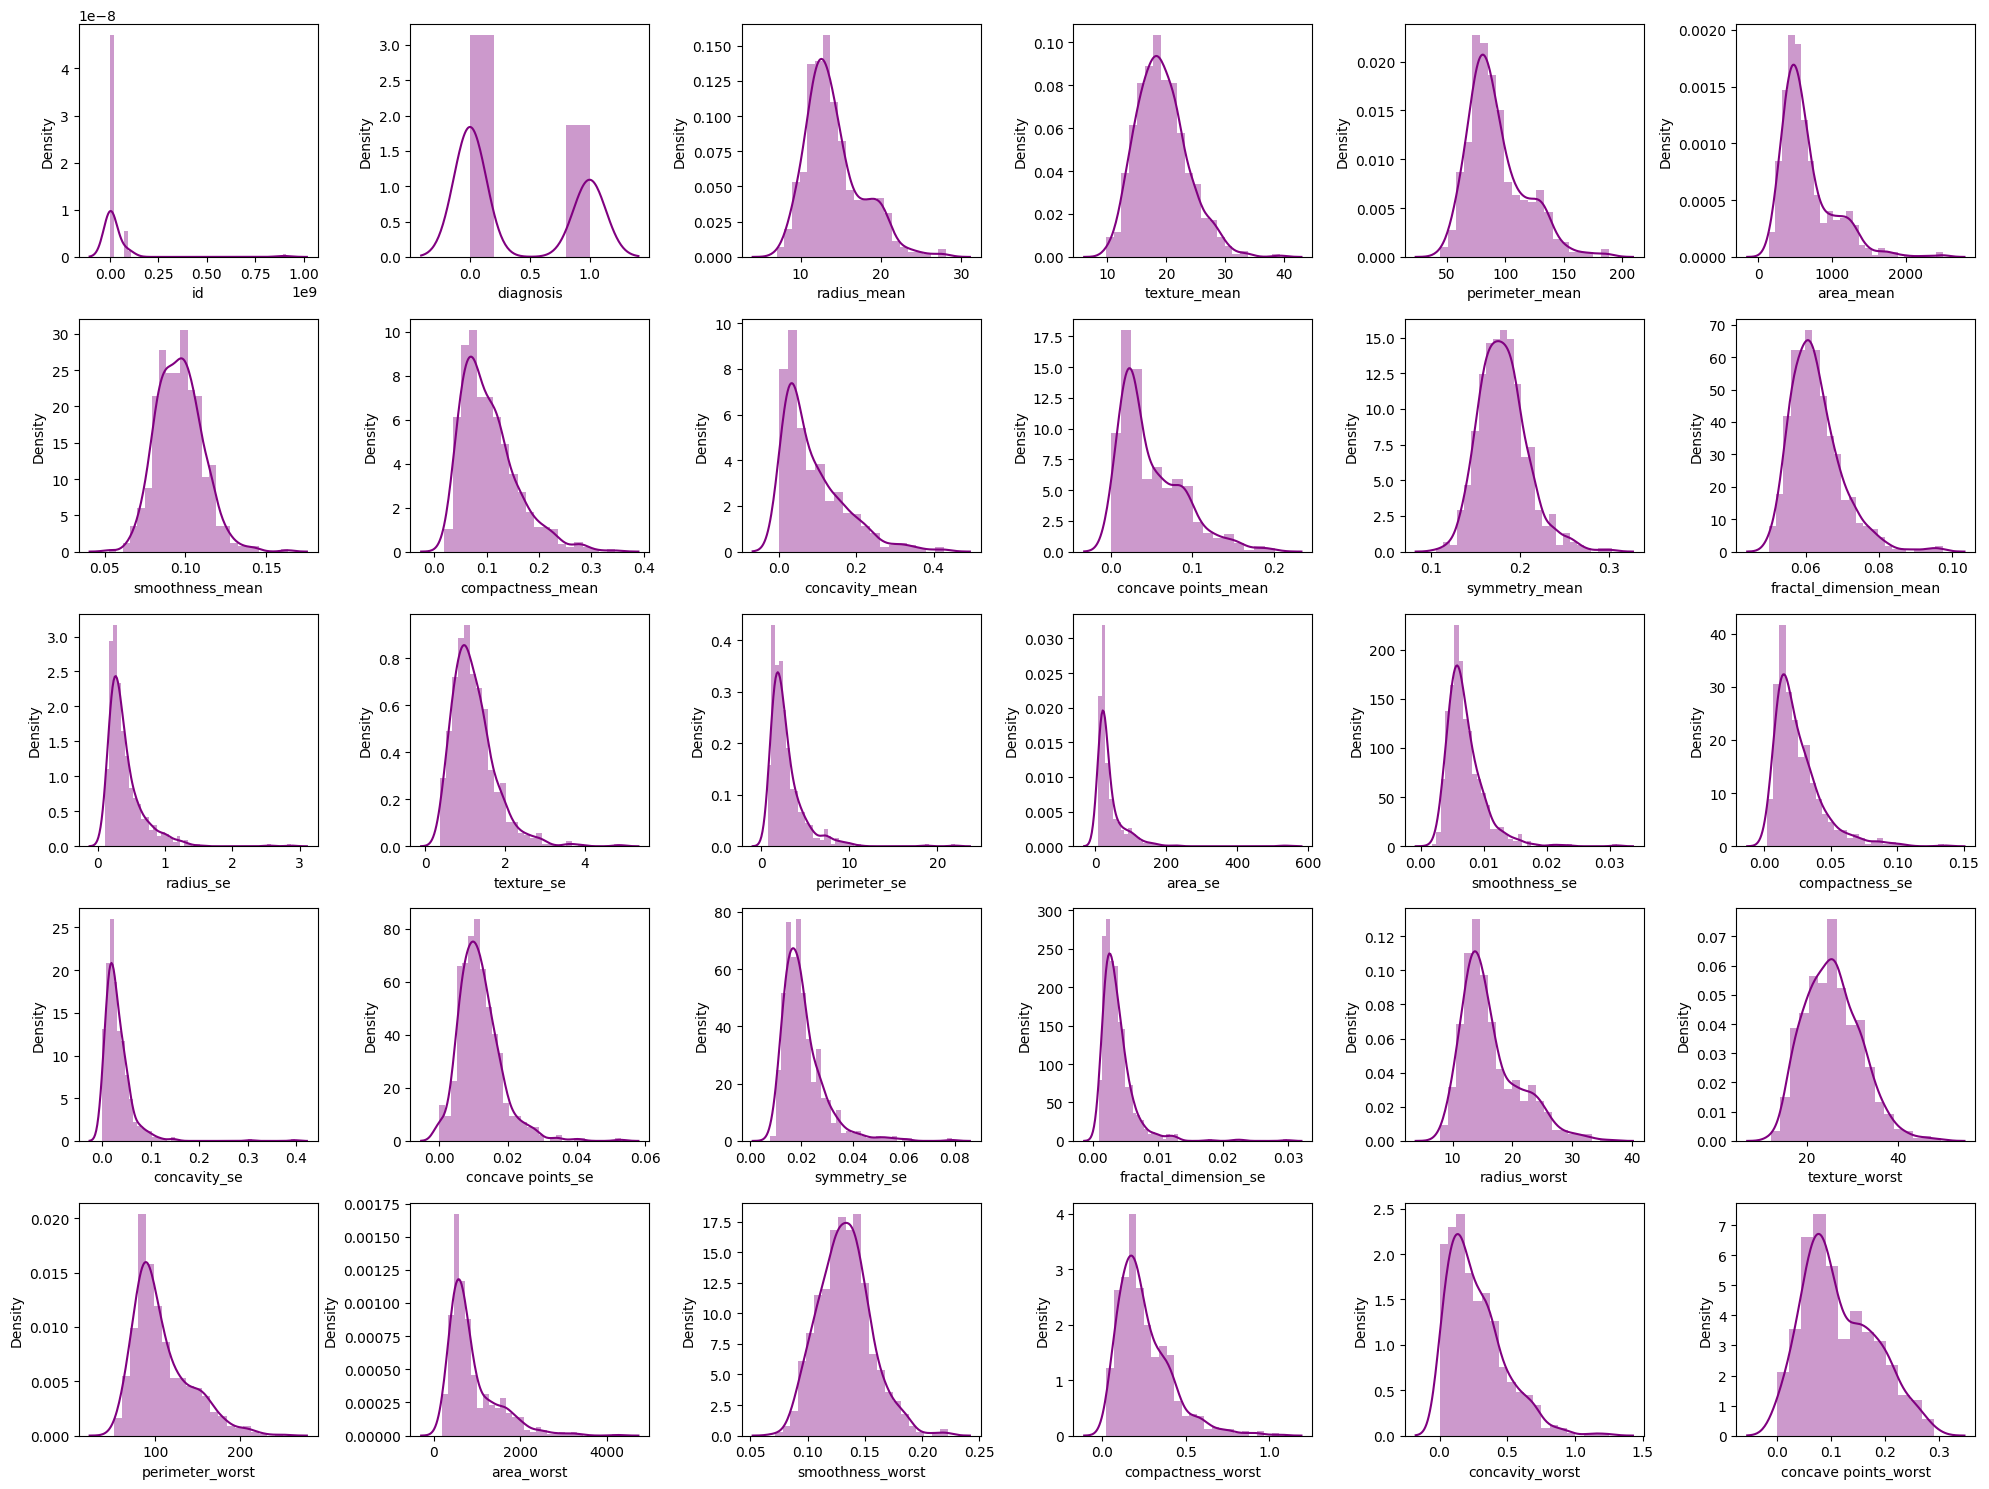

In [10]:
# density graph

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column],color='purple')
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [11]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

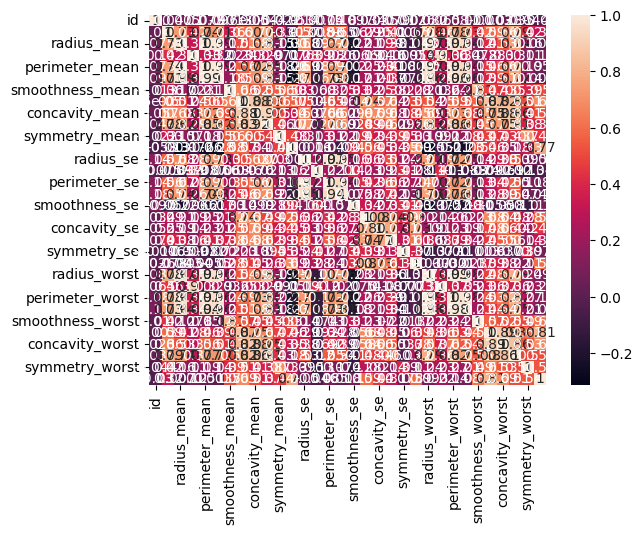

In [12]:
sns.heatmap(df.corr(),annot=True)

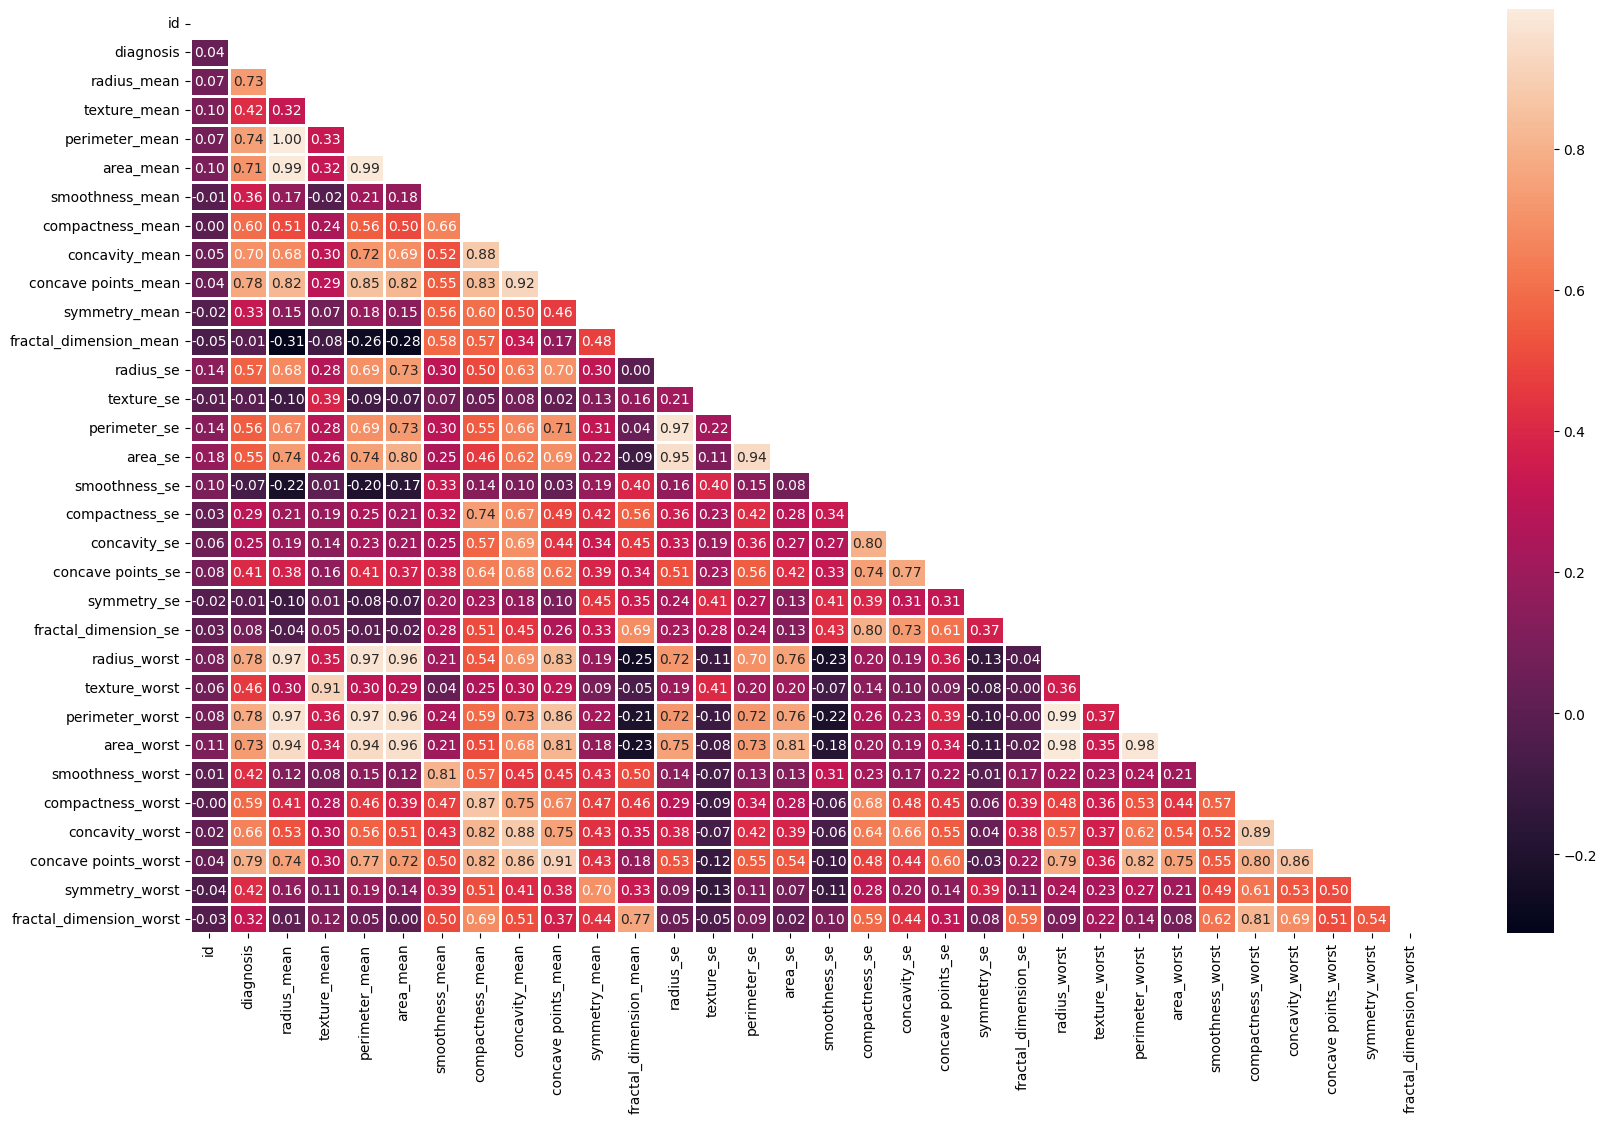

In [13]:
# density graph

plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

## Feature Selection

In [14]:
df.shape

(569, 32)

In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
df.shape

(569, 31)

In [17]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


So,we need 23 feature to do the operation

## Data Preprocessing

In [18]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [21]:
# SVC
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [22]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [23]:
Accuracy=grid_search.best_score_

In [24]:
## Train data accuracy_score
print(100*(Accuracy))

98.02197802197803


In [25]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, Y_train)

SVC(C=15, gamma=0.01, probability=True)

In [26]:
Y_pred = svc.predict(X_test)

In [27]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

## Model Evaluation & Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)
Y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [29]:
print(100*(svc_acc))

98.24561403508771


## Creating a pickle file

In [30]:
import pickle
filename='Trained_model.sav'
pickle.dump(svc,open(filename,'wb'))

In [31]:
loaded_model=pickle.load(open('Trained_model.sav','rb'))